In [1]:
import os
import sys
src_path = sys.path[0].replace("paper_working", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("paper_working", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

rc_={
    "figure.dpi":300,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":False,
    "legend.frameon":False
}
plt.rcParams.update(rc_)


from plot_helper import *

from utils.plot_utils import *
customize_plt() # customize plt configs, see plot_utils

In [2]:
def cal_relative_12mon(fn,drop_base,group_keys=['month_of_year']):
    df=pd.read_excel(fn,sheet_name="Sheet1",index_col=0)
    df_grouped=df.groupby(group_keys)
    df_to_concat=[]
    for i in df_grouped.groups.keys():
        df=df_grouped.get_group(i)
        lower_bound=df[(df.strategy=="optimal")&(df.pred_model=="GT")]["OPEX"].values[0]
        upper_bound=df[(df.strategy=="MSC")&(df.pred_model=="GT")]["OPEX"].values[0]
        diff=upper_bound-lower_bound
        df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
        if drop_base:
            df=df.drop(df[(df.pred_model=="GT")].index)
        df_to_concat.append(df)
    df=pd.concat(df_to_concat)
    return df
def get_df(fn,drop_base):
    concat_k96_dc=cal_relative_12mon(fn,drop_base)
    #concat_k96_dc['pred_K']=concat_k96_dc['exe_K']-concat_k96_dc['concat_K']
    pred_K=concat_k96_dc['concat_K'].unique()
    relative_dic_exeK96_dc=[]
    mean=[]
    for i in pred_K:
        values=concat_k96_dc[concat_k96_dc.concat_K==i]['relative_OPEX'].unique()
        relative_dic_exeK96_dc.append(values)
        mean.append(values.mean())
    return relative_dic_exeK96_dc,pred_K,mean

C:\Users\Lunlo\AppData\Local\Temp\ipykernel_40604\1953959780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_40604\1953959780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_40604\1953959780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

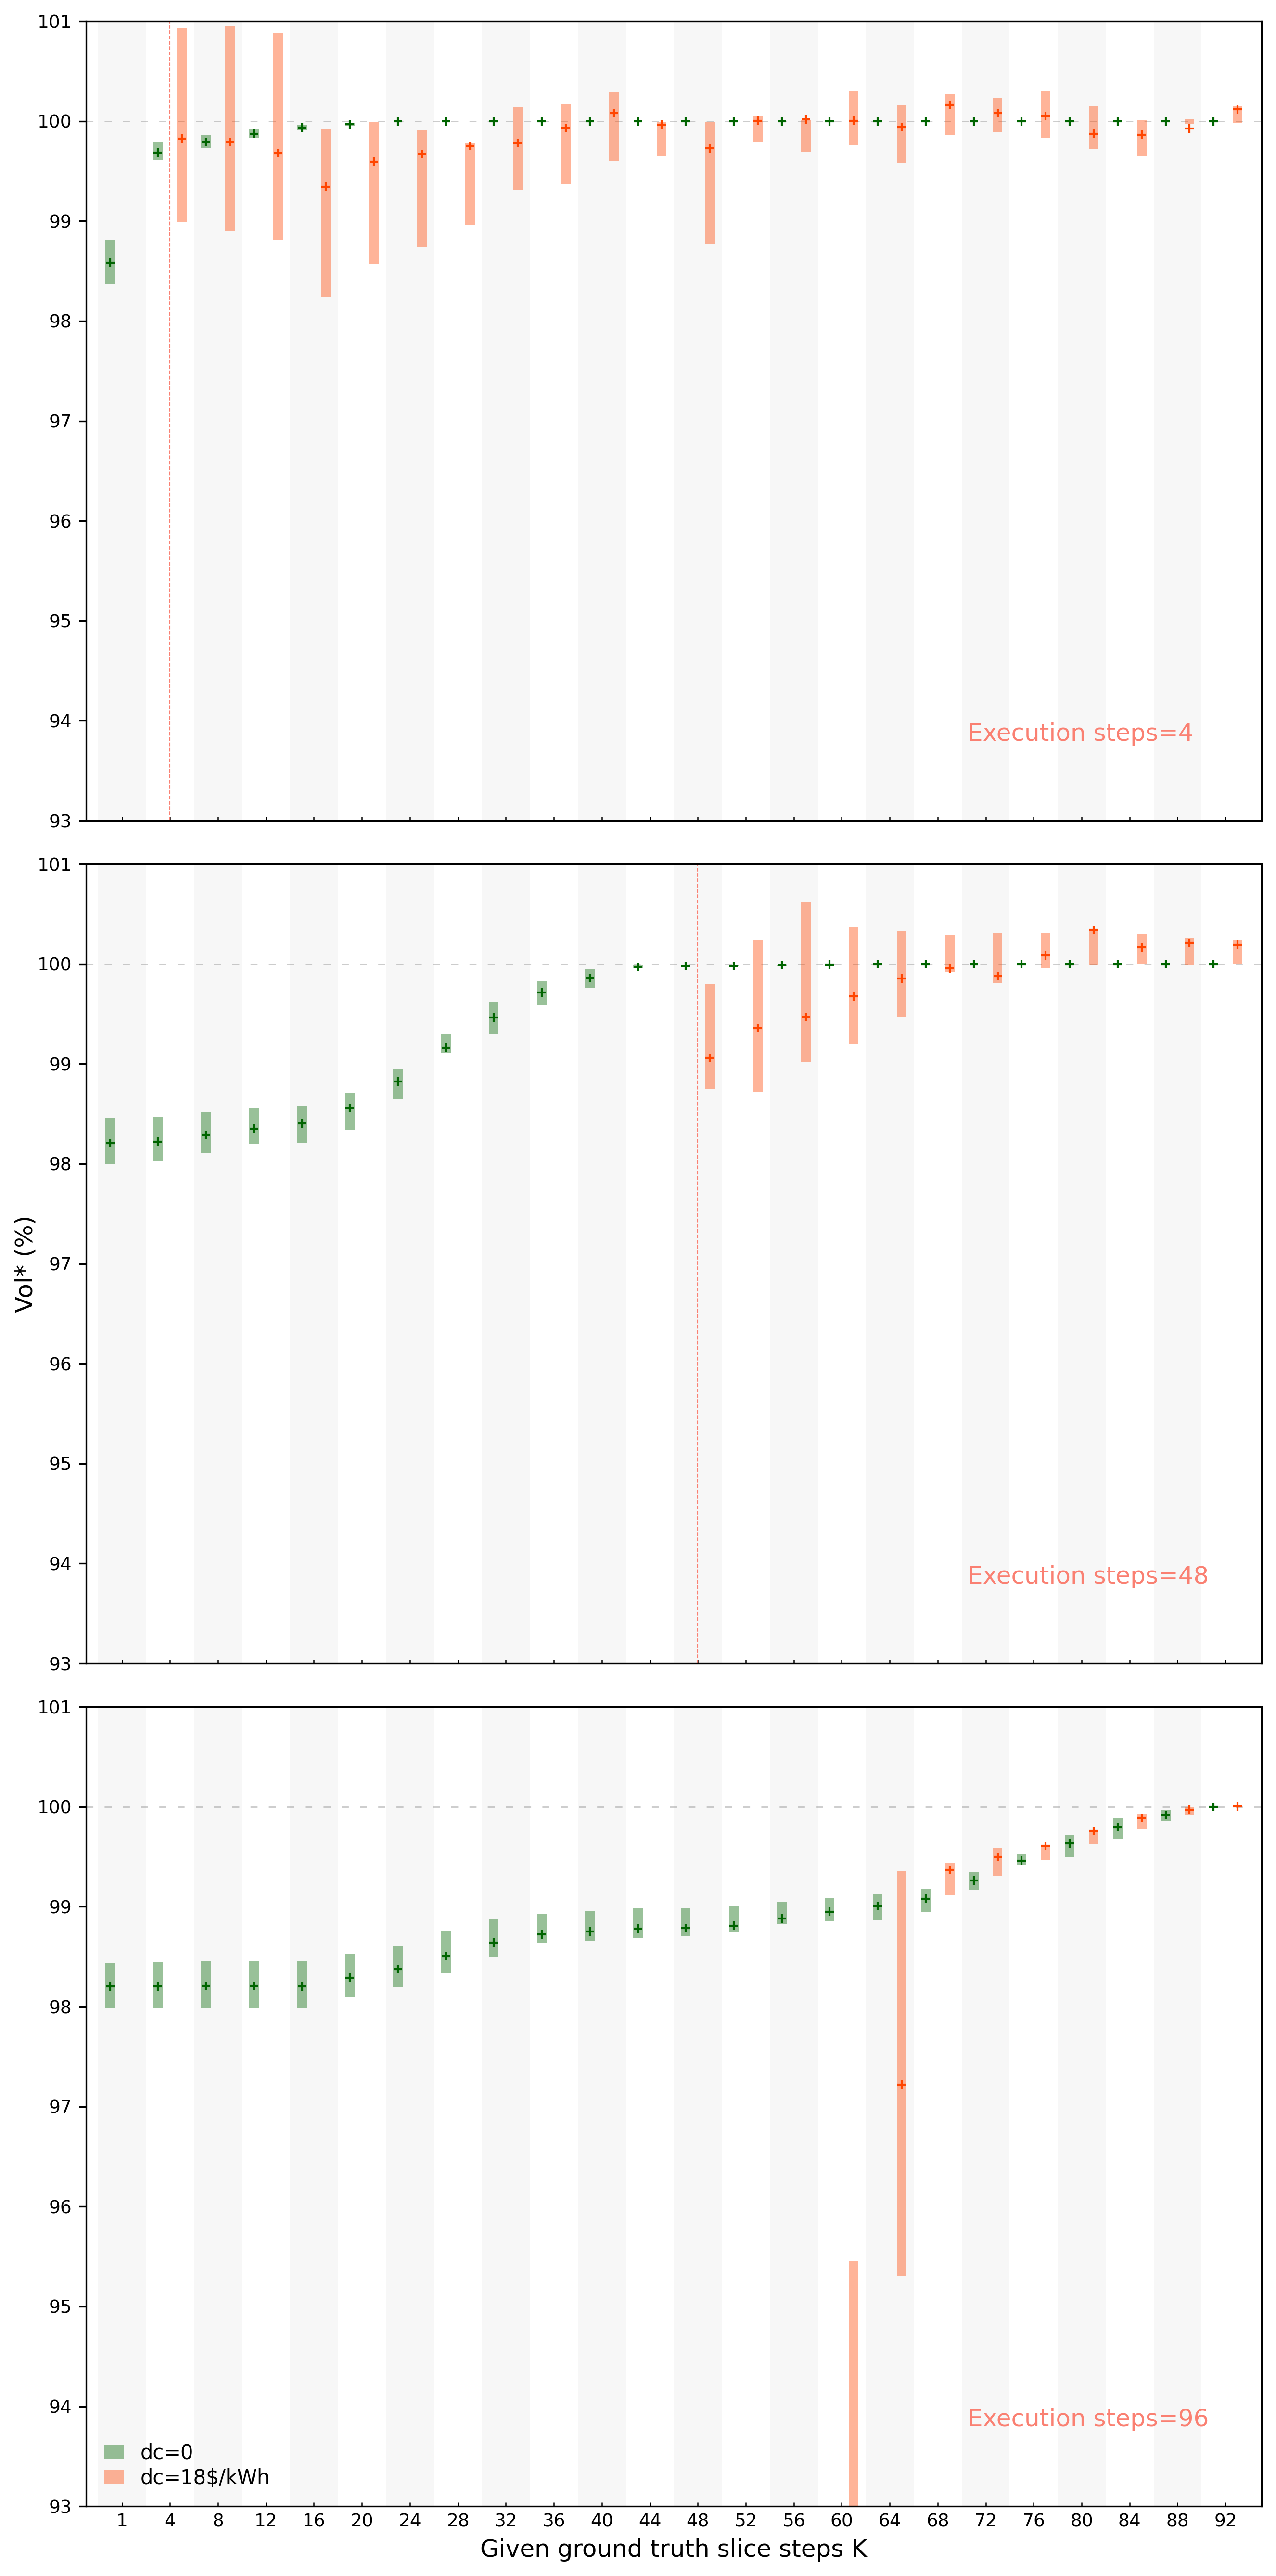

In [3]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.transforms as transforms

legend_fs=10
label_fs=12
ticklabel_fs=9
title_fs=14


fig,axs=plt.subplots(3,1,figsize=(9, 18),sharex=True,sharey=True)
#grid.update(wspace =0.16, hspace = 0.22)

ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

'''ax4.set_xticks(np.arange(0, 25, 6)) 
ax5.set_xticks(np.arange(0, 25, 6)) 
ax4.set_xlabel('Hour of day (May-6,2019)',fontsize=label_fs)
ax5.set_xlabel('Hour of day (May-6,2019)',fontsize=label_fs)
ax6.set_xlabel('Day of month (May,2019)',fontsize=label_fs)

trans = transforms.blended_transform_factory(
    ax6.transData, ax6.transAxes)
ax6.axvspan(pd.Timestamp(2019,5,1,0,0),pd.Timestamp(2019,5,3,0,0),0.85,0.92,
            alpha=0.2,facecolor='gray',edgecolor='gray',linewidth=0.8)
ax6.text(pd.Timestamp(2019,5,3,18,0),0.86,'discr. w/GT',color='gray',transform=trans,fontsize=label_fs)
ax6.axvspan(pd.Timestamp(2019,5,1,0,0),pd.Timestamp(2019,5,3,0,0),0.75,0.755,
            alpha=0.5,facecolor='gray',edgecolor='gray',linewidth=1)
ax6.text(pd.Timestamp(2019,5,3,18,0),0.72,'Operate',color='gray',transform=trans,fontsize=label_fs)'''

########################################################################################

fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K4\concatnate_search.xlsx'
exeK96_dc,pred_K,exeK96_dc_mean=get_df(fn,True)
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K4\concatnate_search_0dc.xlsx'
exeK96_0dc,pred_K,exeK96_0dc_mean=get_df(fn,True)
y_dic={
    'dc=0':exeK96_0dc,
    'dc=18$/kWh':exeK96_dc,
}
mean_dic={
    'dc=0':exeK96_0dc_mean,
    'dc=18$/kWh':exeK96_dc_mean,
}
pred_K=pred_K

cluster_box_plot(
    figsize=(8,4),plot_line_new=False,vol=True,ylimit=(93,101),ax=ax1,
    mape=pred_K,y_dic=y_dic,mean_dic=mean_dic,y_dic_self_define=None,self_define_position=False,
    save_fn=None,x_label=None
)
########################################################################################

fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K48\concatnate_search.xlsx'
exeK96_dc,pred_K,exeK96_dc_mean=get_df(fn,True)
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K48\concatnate_search_0dc.xlsx'
exeK96_0dc,pred_K,exeK96_0dc_mean=get_df(fn,True)
y_dic={
    'dc=0':exeK96_0dc,
    'dc=18$/kWh':exeK96_dc,
}
mean_dic={
    'dc=0':exeK96_0dc_mean,
    'dc=18$/kWh':exeK96_dc_mean,
}
pred_K=pred_K

cluster_box_plot(
    figsize=(8,4),plot_line_new=False,vol=True,ylimit=(93,101),ax=ax2,
    mape=pred_K,y_dic=y_dic,mean_dic=mean_dic,y_dic_self_define=None,self_define_position=False,
    save_fn=None,x_label=None
)

########################################################################################

fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K96\concatnate_search.xlsx'
exeK96_dc,pred_K,exeK96_dc_mean=get_df(fn,True)
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K96\concatnate_search_0dc.xlsx'
exeK96_0dc,pred_K,exeK96_0dc_mean=get_df(fn,True)
y_dic={
    'dc=0':exeK96_0dc,
    'dc=18$/kWh':exeK96_dc,
}
mean_dic={
    'dc=0':exeK96_0dc_mean,
    'dc=18$/kWh':exeK96_dc_mean,
}
pred_K=pred_K

cluster_box_plot(
    figsize=(8,4),plot_line_new=False,vol=True,ylimit=(93,101),ax=ax3,
    mape=pred_K,y_dic=y_dic,mean_dic=mean_dic,y_dic_self_define=None,self_define_position=False,
    save_fn=None,x_label='Given ground truth slice steps K'
)
########################################################################################
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.set_ylabel(None)
ax3.set_ylabel(None)

trans = transforms.blended_transform_factory(
    ax1.transAxes, ax1.transAxes)
ax1.text(0.75,0.1,'Execution steps=4',color='salmon',transform=trans,fontsize=label_fs)
ax1.axvline(2,color='salmon',linestyle='--',linewidth=0.5)
trans = transforms.blended_transform_factory(
    ax2.transAxes, ax2.transAxes)
ax2.text(0.75,0.1,'Execution steps=48',color='salmon',transform=trans,fontsize=label_fs)
ax2.axvline(13,color='salmon',linestyle='--',linewidth=0.5)
trans = transforms.blended_transform_factory(
    ax3.transAxes, ax3.transAxes)
ax3.text(0.75,0.1,'Execution steps=96',color='salmon',transform=trans,fontsize=label_fs)

plt.tight_layout()

In [4]:
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K4\concatnate_search.xlsx'
exeK4_dc,pred_K,exeK4_dc_mean=get_df(fn,True)
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K4\concatnate_search_0dc.xlsx'
exeK4_0dc,pred_K,exeK4_0dc_mean=get_df(fn,True)

fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K48\concatnate_search.xlsx'
exeK48_dc,pred_K,exeK48_dc_mean=get_df(fn,True)
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K48\concatnate_search_0dc.xlsx'
exeK48_0dc,pred_K,exeK48_0dc_mean=get_df(fn,True)

fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K96\concatnate_search.xlsx'
exeK96_dc,pred_K,exeK96_dc_mean=get_df(fn,True)
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K96\concatnate_search_0dc.xlsx'
exeK96_0dc,pred_K,exeK96_0dc_mean=get_df(fn,True)

y_dic_dc={
    'execution steps=4':exeK4_dc,
    'execution steps=48':exeK48_dc,
    'execution steps=96':exeK96_dc,
}

y_dic_0dc={
    'execution steps=4':exeK4_0dc,
    'execution steps=48':exeK48_0dc,
    'execution steps=96':exeK96_0dc,
}

mean_dic_dc={
    'execution steps=4':exeK4_dc_mean,
    'execution steps=48':exeK48_dc_mean,
    'execution steps=96':exeK96_dc_mean,
}

mean_dic_0dc={
    'execution steps=4':exeK4_0dc_mean,
    'execution steps=48':exeK48_0dc_mean,
    'execution steps=96':exeK96_0dc_mean,
}

C:\Users\Lunlo\AppData\Local\Temp\ipykernel_40604\1953959780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_40604\1953959780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_40604\1953959780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

C:\Users\Lunlo\AppData\Local\Temp\ipykernel_40604\539368190.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


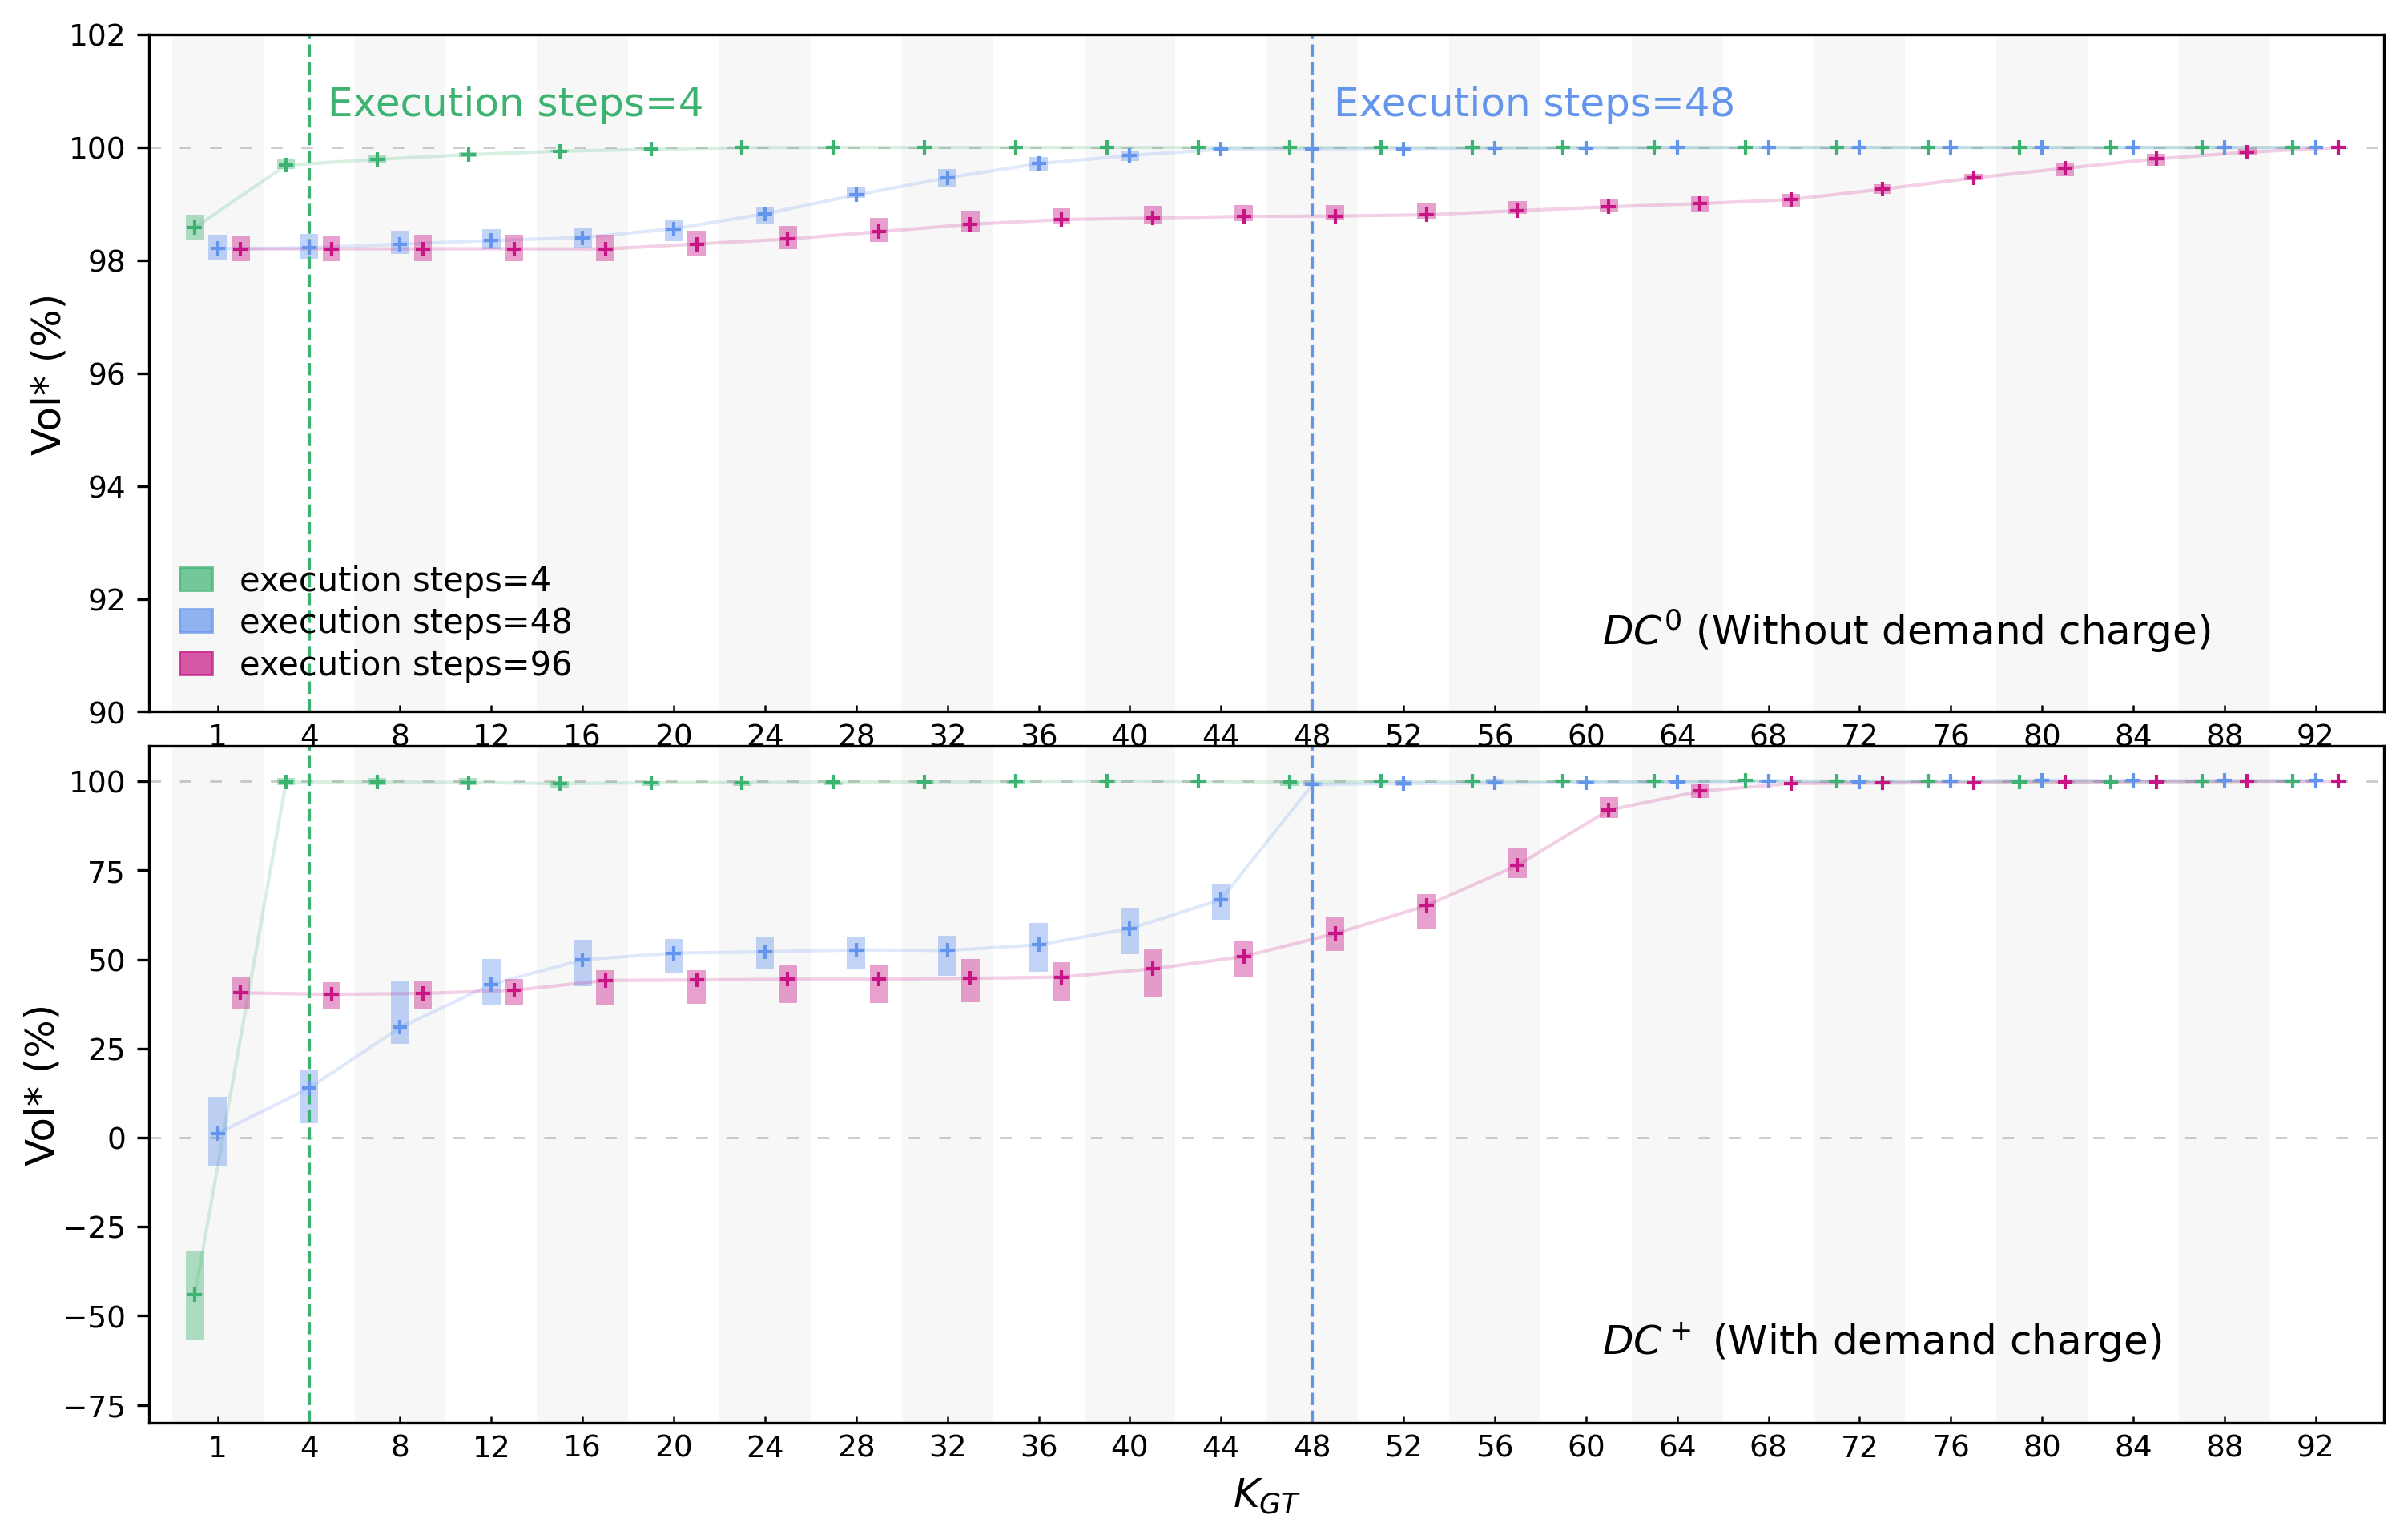

In [7]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.transforms as transforms

import matplotlib.gridspec as Gridspec  # 用网格来创建子图

legend_fs=10
label_fs=12
ticklabel_fs=9
title_fs=14

fig = plt.figure(figsize=(12,7.5))
gs = Gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1]) 
gs.update(wspace =0, hspace = 0.05)

ax1 = fig.add_subplot(gs[0, :]) # 占据第一行的所有列
#ax1.text(0.5, 0.5, "1st plot", verticalalignment='center', ha='center') 
ax2 = fig.add_subplot(gs[1, :],sharex=ax1)

cluster_box_plot(
    figsize=(8,4),plot_line_new=True,vol=True,ylimit=(90,102),ax=ax1,
    mape=pred_K,y_dic=y_dic_0dc,mean_dic=mean_dic_0dc,y_dic_self_define=None,self_define_position=False,
    save_fn=None,x_label='Given ground truth slice steps K'
)

cluster_box_plot(
    figsize=(8,4),plot_line_new=True,vol=True,ylimit=(-80,110),ax=ax2,
    mape=pred_K,y_dic=y_dic_dc,mean_dic=mean_dic_dc,y_dic_self_define=None,self_define_position=False,
    save_fn=None,x_label='$K_{GT}$'
)
########################################################################################
#ax1.get_legend().remove()

ax2.get_legend().remove()
ax1.set_xlabel(None)

trans = transforms.blended_transform_factory(
    ax1.transAxes, ax1.transAxes)
ax1.text(0.08,0.88,'Execution steps=4',color='mediumseagreen',transform=trans,fontsize=label_fs)
ax1.axvline(2,color='mediumseagreen',linestyle='--',linewidth=1)
ax2.axvline(2,color='mediumseagreen',linestyle='--',linewidth=1)
ax1.text(0.53,0.88,'Execution steps=48',color='cornflowerblue',transform=trans,fontsize=label_fs)
ax1.axvline(13,color='cornflowerblue',linestyle='--',linewidth=1)
ax2.axvline(13,color='cornflowerblue',linestyle='--',linewidth=1)


ax1.text(0.65,0.1,'$DC^0$ (Without demand charge)',color='black',transform=trans,fontsize=label_fs)
trans = transforms.blended_transform_factory(
    ax2.transAxes, ax2.transAxes)
ax2.text(0.65,0.1,'$DC^+$ (With demand charge)',color='black',transform=trans,fontsize=label_fs)

'''trans = transforms.blended_transform_factory(
    ax2.transAxes, ax2.transAxes)
ax2.text(0.75,0.1,'Execution steps=48',color='salmon',transform=trans,fontsize=label_fs)
ax2.axvline(13,color='salmon',linestyle='--',linewidth=0.5)'''
ax1.tick_params(axis='x',label1On=False)

plt.tight_layout()

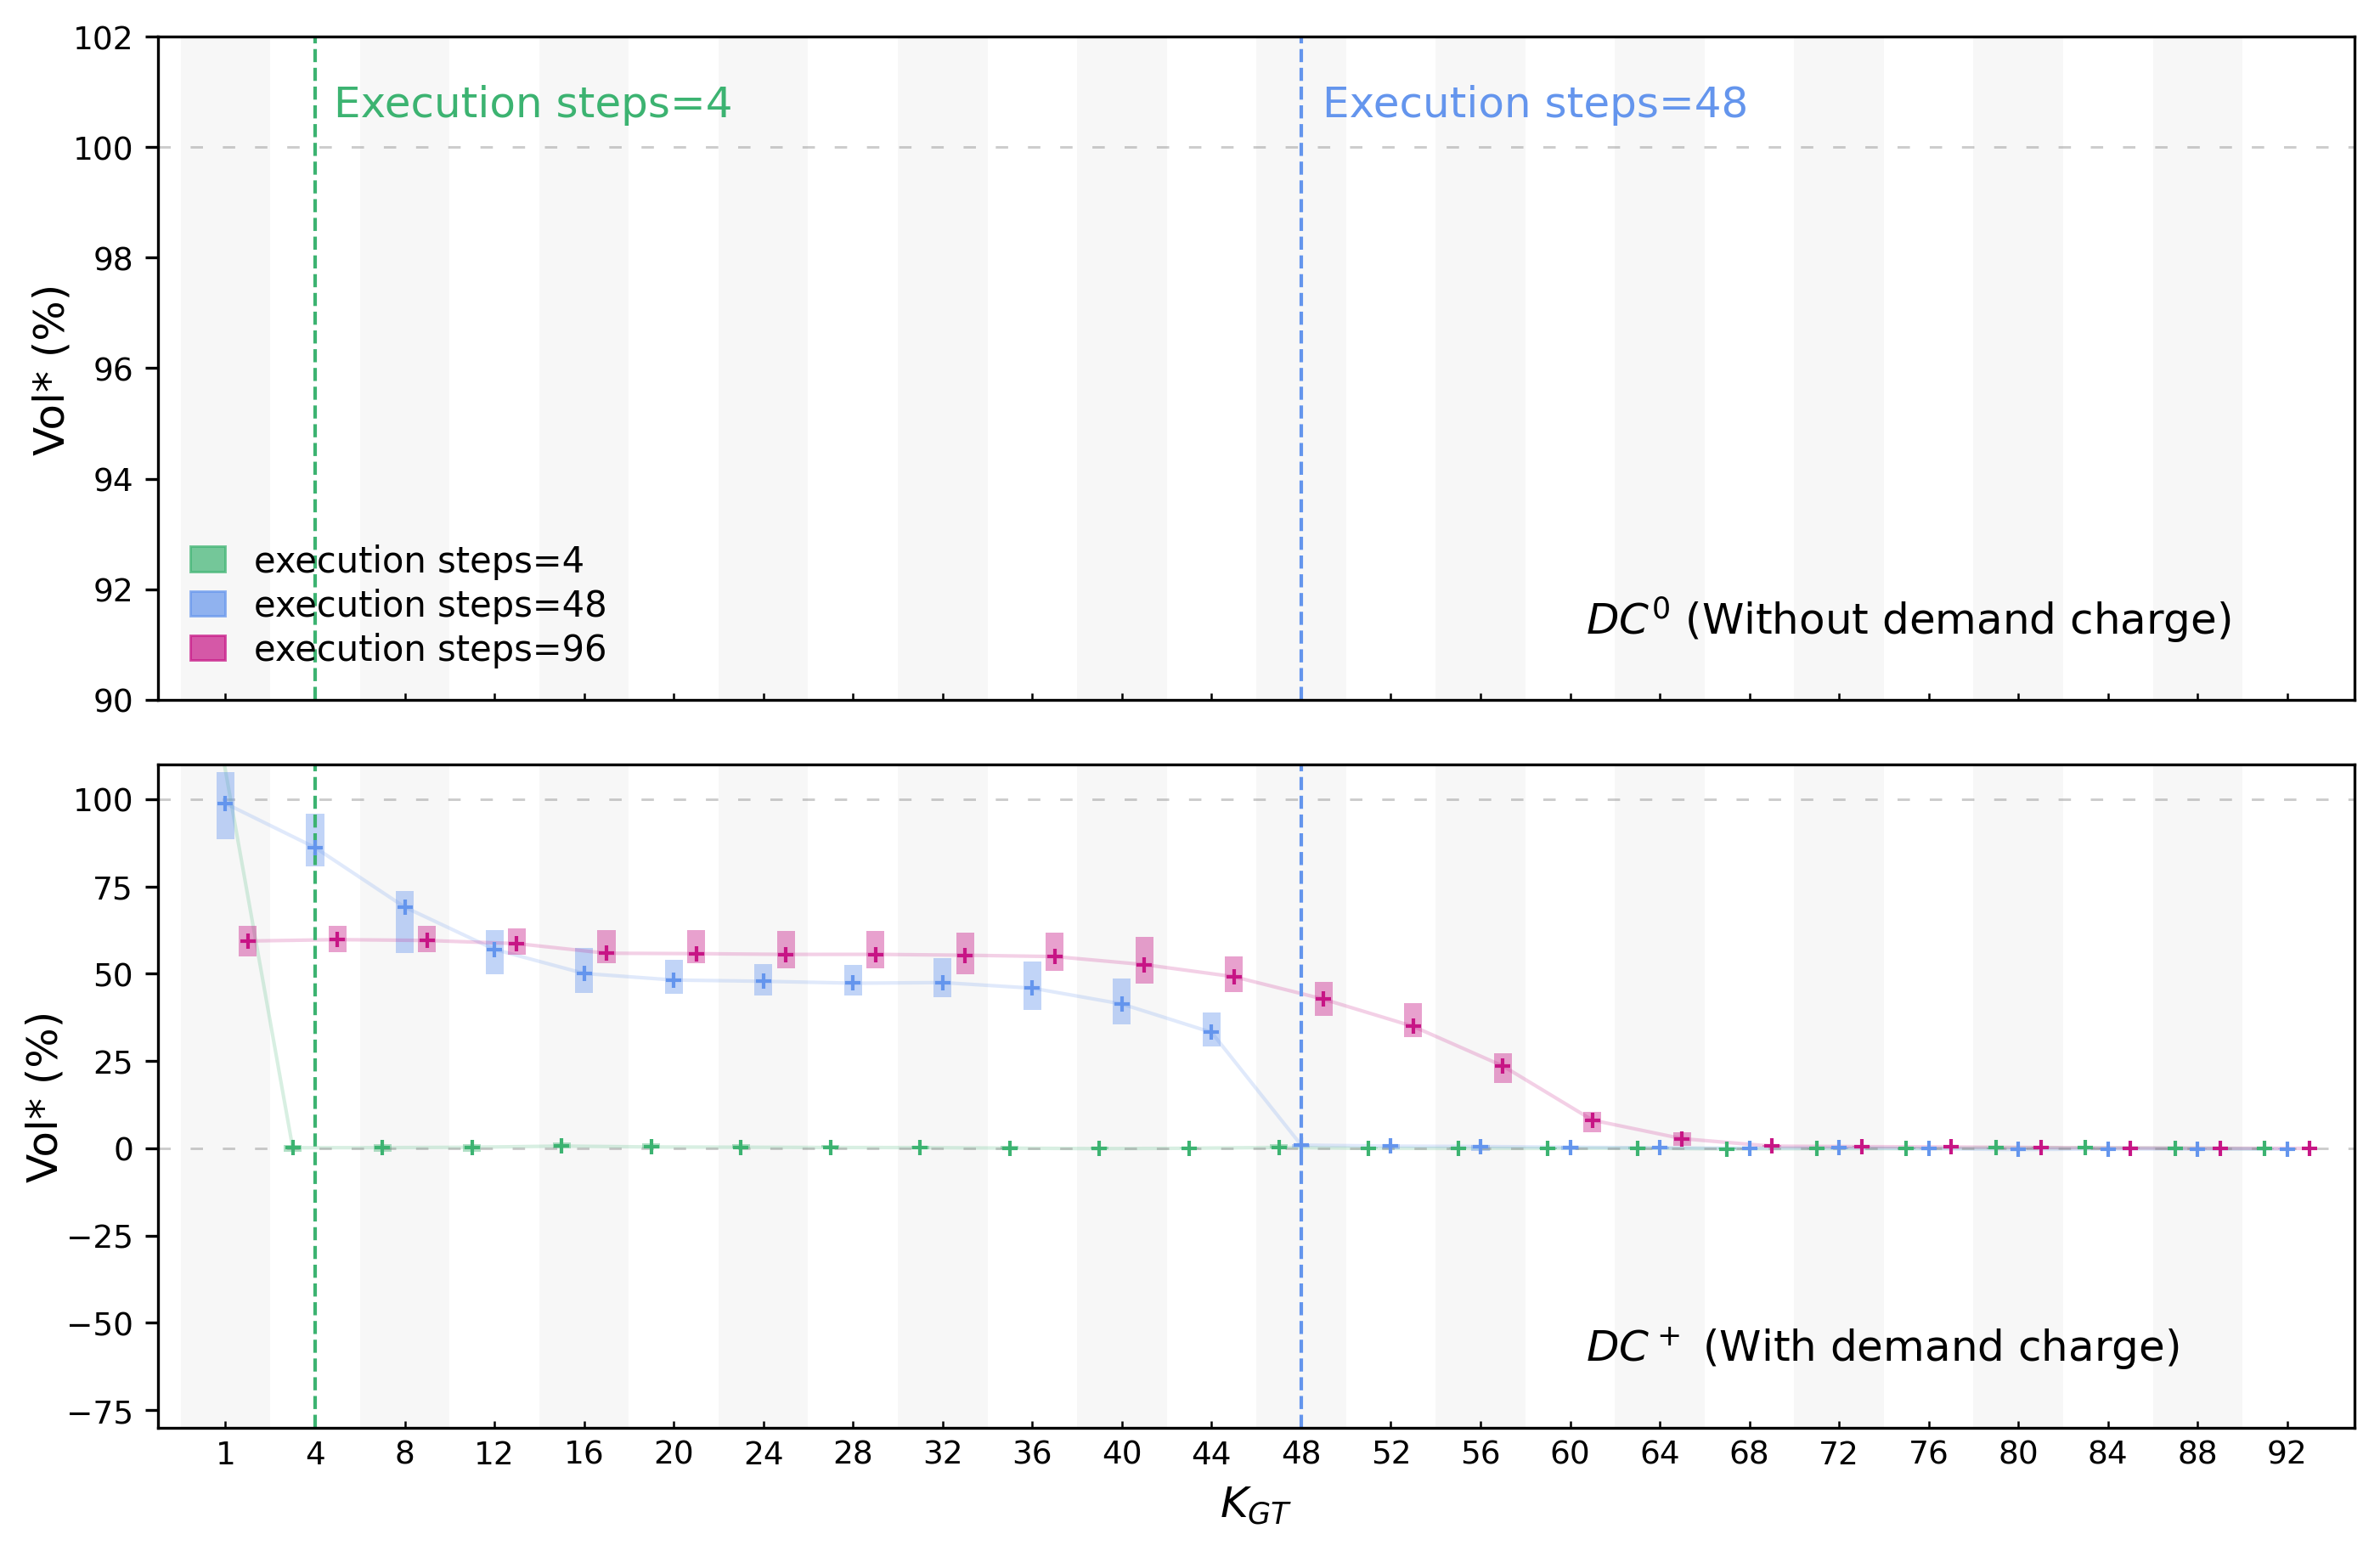

In [6]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.transforms as transforms

import matplotlib.gridspec as Gridspec  # 用网格来创建子图

legend_fs=10
label_fs=12
ticklabel_fs=9
title_fs=14

fig,axs=plt.subplots(2,1,figsize=(9.5, 6.25),sharex=True,sharey=False)
#grid.update(wspace =0.16, hspace = 0.22)

ax1 = axs[0]
ax2 = axs[1]

#gs = Gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1]) 
#gs.update(wspace =0, hspace = 0.05)

#ax1 = fig.add_subplot(gs[0, :],sharex=ax2) # 占据第一行的所有列
#ax1.text(0.5, 0.5, "1st plot", verticalalignment='center', ha='center') 
#ax2 = fig.add_subplot(gs[1, :])


cluster_box_plot(
    figsize=(8,4),plot_line_new=True,vol=True,ylimit=(90,102),ax=ax1,
    mape=pred_K,y_dic=y_dic_0dc,mean_dic=mean_dic_0dc,y_dic_self_define=None,self_define_position=False,
    save_fn=None,x_label='Given ground truth slice steps K'
)

cluster_box_plot(
    figsize=(8,4),plot_line_new=True,vol=True,ylimit=(-80,110),ax=ax2,
    mape=pred_K,y_dic=y_dic_dc,mean_dic=mean_dic_dc,y_dic_self_define=None,self_define_position=False,
    save_fn=None,x_label='$K_{GT}$'
)
########################################################################################
#ax1.get_legend().remove()

ax2.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_xticklabels([])
#handles, labels = ax1.get_legend()
#ax1.legend(handles, labels, loc='lower right')
trans = transforms.blended_transform_factory(
    ax1.transAxes, ax1.transAxes)
ax1.text(0.08,0.88,'Execution steps=4',color='mediumseagreen',transform=trans,fontsize=label_fs)
ax1.axvline(2,color='mediumseagreen',linestyle='--',linewidth=1)
ax2.axvline(2,color='mediumseagreen',linestyle='--',linewidth=1)
ax1.text(0.53,0.88,'Execution steps=48',color='cornflowerblue',transform=trans,fontsize=label_fs)
ax1.axvline(13,color='cornflowerblue',linestyle='--',linewidth=1)
ax2.axvline(13,color='cornflowerblue',linestyle='--',linewidth=1)


ax1.text(0.65,0.1,'$DC^0$ (Without demand charge)',color='black',transform=trans,fontsize=label_fs)
trans = transforms.blended_transform_factory(
    ax2.transAxes, ax2.transAxes)
ax2.text(0.65,0.1,'$DC^+$ (With demand charge)',color='black',transform=trans,fontsize=label_fs)

'''trans = transforms.blended_transform_factory(
    ax2.transAxes, ax2.transAxes)
ax2.text(0.75,0.1,'Execution steps=48',color='salmon',transform=trans,fontsize=label_fs)
ax2.axvline(13,color='salmon',linestyle='--',linewidth=0.5)'''
ax1.tick_params(axis='x',label1On=False)

plt.tight_layout()